In [1]:
#Import important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
#Import Big Mart Sale Train_Modified data set
train_modified = pd.read_csv('train_bigmart_modified.csv')

train_modified.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Years,Supermarket Type1,Supermarket Type2,Supermarket Type3,Regular,...,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Item_Outlet_Sales
0,9.30,0.016047,249.8092,2,1,14,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,5.92,0.019278,48.2692,2,3,4,0,1,0,1,...,0,0,1,0,0,0,0,0,0,443.4228
2,17.50,0.016760,141.6180,2,1,14,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,19.20,0.057851,182.0950,2,3,15,0,0,0,1,...,0,0,0,0,0,0,0,0,0,732.3800
4,8.93,0.057851,53.8614,3,3,26,1,0,0,0,...,1,0,0,0,0,0,0,0,0,994.7052


In [3]:
#Define Feature Variables and Target Variables
X = train_modified.drop('Item_Outlet_Sales', axis=1) #Feature Variables
y= train_modified['Item_Outlet_Sales'] #Target Variables

In [4]:
#Split data set to 30% Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lasso & Ridge Regression

In [11]:
#Import Lasso Regression Model
from sklearn.linear_model import Lasso

#Instantiate Lasso Model
lasso = Lasso(alpha = 0.1, normalize=True)

In [15]:
#Cross Validation with 10 fold 
lasso_cv = -cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

#Average RMSE of Lasso
MSE = np.mean(lasso_cv)
RMSE = np.sqrt(MSE)

print('Average RMSE of Lasso: {:.2f}'.format(RMSE))

Average RMSE of Lasso: 1143.55


In [16]:
#Import Ridge Regression Model
from sklearn.linear_model import Ridge

#Instantiate Lasso Model
ridge = Ridge(alpha = 0.1, normalize=True)

In [17]:
#Cross Validation with 10 fold 
ridge_cv = -cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

#Average RMSE of Lasso
MSE = np.mean(ridge_cv)
RMSE = np.sqrt(MSE)

print('Average RMSE of Lasso: {:.2f}'.format(RMSE))

Average RMSE of Lasso: 1156.23


# Decision Tree

In [18]:
#import important Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

SEED = 123

#Build Decision Tree Regression
dt = DecisionTreeRegressor(random_state=SEED)

#Cross Validation with 10 fold
cv_dt = -cross_val_score(dt, X_train, y_train, scoring='neg_mean_squared_error',cv=10)

In [20]:
#DecisionTree Regression Performance from RMSE
mean_MSE = np.mean(cv_dt)
RMSE = np.sqrt(mean_MSE)
print('RMSE of DecisionTree Regression:{:.2f}'.format(RMSE))

RMSE of DecisionTree Regression:1551.21


# Random Forest

In [21]:
#import important Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

SEED = 123

#Build Random Forest Regressrion with n_estimators = 100
rf = RandomForestRegressor(n_estimators=100,random_state=SEED)

#Cross Validation with 10 fold
cv_rf = -cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error',cv=10)

In [22]:
#Random Forest Regression Performance from RMSE
mean_MSE = np.mean(cv_rf)
RMSE = np.sqrt(mean_MSE)
print('RMSE of RandomForest Regression:{:.2f}'.format(RMSE))

RMSE of RandomForest Regression:1156.54


In [27]:
#Cross Validation with 10 fold
cv_rf = cross_val_score(rf, X_train, y_train ,cv=10)

#Random Forest Regression Performance from R-Square
r2_score = np.mean(cv_rf)

print('R-Square of RandomForest Regression:{:.4f}'.format(r2_score))

R-Square of RandomForest Regression:0.5473


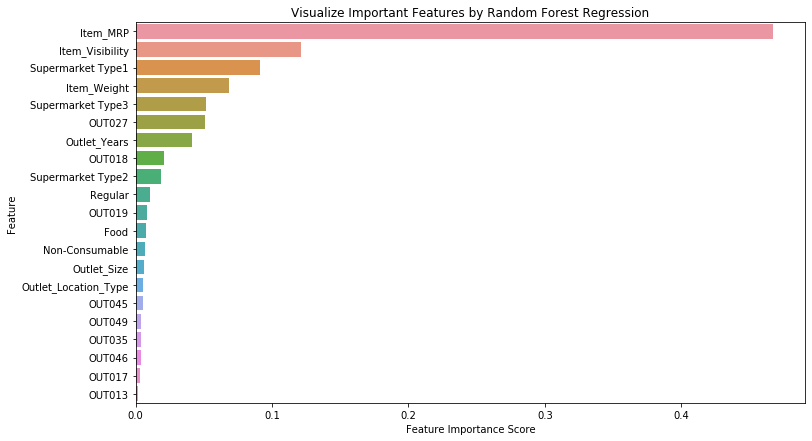

In [24]:
#Fit Random Forest Model to Training Set
rf.fit(X_train, y_train)

#Feature Contribution
feature_cols = X_train.columns
feature_imp = pd.Series(rf.feature_importances_, index = feature_cols).sort_values(ascending = False)
feature_imp

#Create Bar Plot
plt.figure(figsize=(12,7))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Visualize Important Features by Random Forest Regression')
plt.show()

# Gradient Boosting

In [18]:
#import important Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

SEED = 123

#Build Gradient Boosting Regression with n_estimator =100, max_depth =3
gb = GradientBoostingRegressor(n_estimators=100, random_state=SEED)

#Cross Validation with 5 fold
cv_gb = -cross_val_score(gb, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [19]:
gb.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>

In [29]:
#Gradient Boosting Regression Performance from RMSE
mean_MSE = np.mean(cv_gb)
RMSE = np.sqrt(mean_MSE)
print('RMSE of Gradient Boosting Regression:{:.2f}'.format(RMSE))

RMSE of Gradient Boosting Regression:1098.70


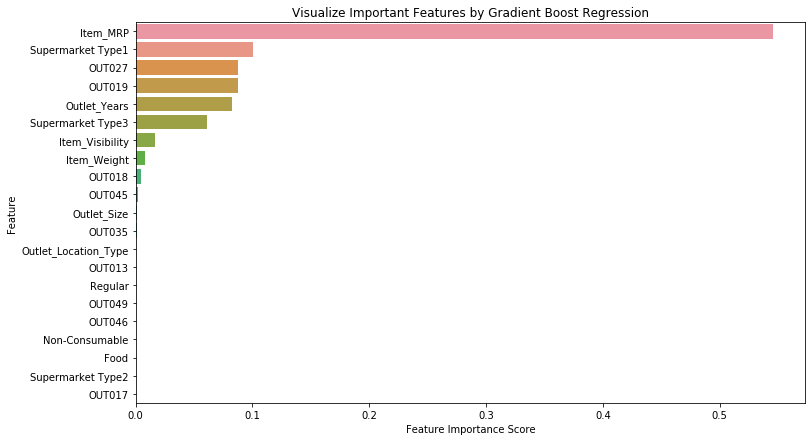

In [30]:
#Fit Random Forest Model to Training Set
gb.fit(X_train, y_train)

#Feature Contribution
feature_cols = X_train.columns
feature_imp = pd.Series(gb.feature_importances_, index = feature_cols).sort_values(ascending = False)
feature_imp

#Create Bar Plot
plt.figure(figsize=(12,7))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Visualize Important Features by Gradient Boost Regression')
plt.show()

# XGBoost

In [12]:
#Import XGBoost Library
import xgboost as xgb

#Instantiate XGBoost Model
xgb_reg = xgb.XGBRegressor()

#Cross Validation with 10 fold
cv_xgb = -cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)


D:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:20:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:20:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:20:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:20:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:20:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:20:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:20:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:20:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:20:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:20:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
#Random Forest Regression Performance from RMSE
mean_MSE = np.mean(cv_xgb)
RMSE = np.sqrt(mean_MSE)
print('RMSE of RandomForest Regression:{:.2f}'.format(RMSE))

RMSE of RandomForest Regression:1096.66


In [20]:
xgb_reg.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)>

[11:24:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


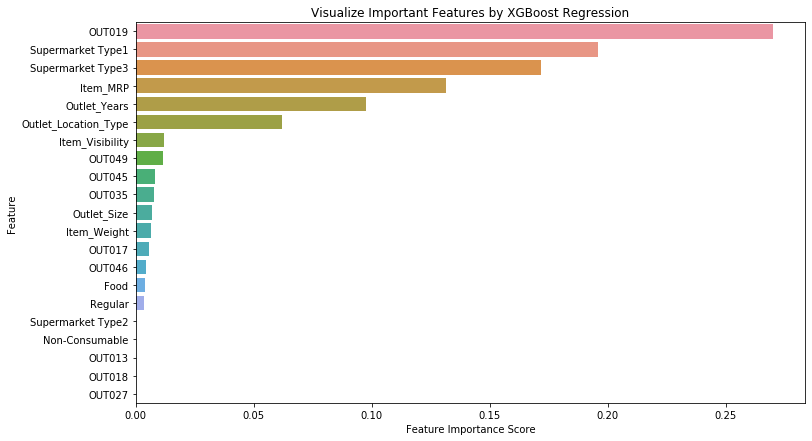

In [22]:
#Fit Random Forest Model to Training Set
xgb_reg.fit(X_train, y_train)

#Feature Contribution
feature_cols = X_train.columns
feature_imp = pd.Series(xgb_reg.feature_importances_, index = feature_cols).sort_values(ascending = False)
feature_imp

#Create Bar Plot
plt.figure(figsize=(12,7))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Visualize Important Features by XGBoost Regression')
plt.show()

# CatBoost

In [10]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42)

#Cross Validation with 10 fold
cv_cat = -cross_val_score(cat, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

0:	learn: 1647.8877789	total: 3.75ms	remaining: 372ms
1:	learn: 1570.3164504	total: 6.65ms	remaining: 326ms
2:	learn: 1501.7567664	total: 9.18ms	remaining: 297ms
3:	learn: 1443.4217558	total: 11.7ms	remaining: 282ms
4:	learn: 1389.2187496	total: 14.6ms	remaining: 278ms
5:	learn: 1341.4389954	total: 18ms	remaining: 282ms
6:	learn: 1306.0430317	total: 21.1ms	remaining: 281ms
7:	learn: 1271.6650439	total: 23.7ms	remaining: 273ms
8:	learn: 1247.1971364	total: 26.3ms	remaining: 266ms
9:	learn: 1221.5303962	total: 28.9ms	remaining: 261ms
10:	learn: 1201.9225960	total: 31.4ms	remaining: 254ms
11:	learn: 1183.4122022	total: 34.5ms	remaining: 253ms
12:	learn: 1168.2544281	total: 37.4ms	remaining: 251ms
13:	learn: 1155.2789465	total: 40ms	remaining: 246ms
14:	learn: 1144.8924968	total: 42.5ms	remaining: 241ms
15:	learn: 1136.5131380	total: 45.2ms	remaining: 237ms
16:	learn: 1128.8204041	total: 47.7ms	remaining: 233ms
17:	learn: 1123.4701408	total: 49.8ms	remaining: 227ms
18:	learn: 1117.6827038	

83:	learn: 1042.3176196	total: 210ms	remaining: 40ms
84:	learn: 1041.2334820	total: 212ms	remaining: 37.5ms
85:	learn: 1040.2297899	total: 215ms	remaining: 35ms
86:	learn: 1039.1837146	total: 217ms	remaining: 32.5ms
87:	learn: 1038.6715390	total: 220ms	remaining: 30ms
88:	learn: 1038.2493402	total: 222ms	remaining: 27.5ms
89:	learn: 1037.1690478	total: 225ms	remaining: 25ms
90:	learn: 1036.4858315	total: 227ms	remaining: 22.5ms
91:	learn: 1036.1234917	total: 230ms	remaining: 20ms
92:	learn: 1035.0194806	total: 232ms	remaining: 17.5ms
93:	learn: 1034.8009584	total: 235ms	remaining: 15ms
94:	learn: 1034.3592753	total: 237ms	remaining: 12.5ms
95:	learn: 1033.9442636	total: 239ms	remaining: 9.98ms
96:	learn: 1033.4816099	total: 242ms	remaining: 7.48ms
97:	learn: 1032.9456800	total: 244ms	remaining: 4.98ms
98:	learn: 1032.4322316	total: 247ms	remaining: 2.49ms
99:	learn: 1031.5041217	total: 249ms	remaining: 0us
0:	learn: 1637.1991470	total: 4.9ms	remaining: 485ms
1:	learn: 1559.7876843	tota

41:	learn: 1070.4091482	total: 113ms	remaining: 157ms
42:	learn: 1069.2446854	total: 116ms	remaining: 154ms
43:	learn: 1068.6444405	total: 118ms	remaining: 151ms
44:	learn: 1068.2384831	total: 121ms	remaining: 148ms
45:	learn: 1067.6116665	total: 123ms	remaining: 145ms
46:	learn: 1067.1358231	total: 126ms	remaining: 142ms
47:	learn: 1066.1084722	total: 129ms	remaining: 140ms
48:	learn: 1064.9079629	total: 132ms	remaining: 137ms
49:	learn: 1063.7875634	total: 134ms	remaining: 134ms
50:	learn: 1063.2237849	total: 137ms	remaining: 132ms
51:	learn: 1062.5757900	total: 139ms	remaining: 129ms
52:	learn: 1061.5752356	total: 142ms	remaining: 126ms
53:	learn: 1061.2702797	total: 153ms	remaining: 130ms
54:	learn: 1060.6462716	total: 155ms	remaining: 127ms
55:	learn: 1060.0971975	total: 158ms	remaining: 124ms
56:	learn: 1059.3837845	total: 161ms	remaining: 121ms
57:	learn: 1058.5861910	total: 164ms	remaining: 118ms
58:	learn: 1057.8315800	total: 167ms	remaining: 116ms
59:	learn: 1057.0030739	tota

15:	learn: 1123.4957891	total: 43.1ms	remaining: 226ms
16:	learn: 1116.9539008	total: 45.5ms	remaining: 222ms
17:	learn: 1109.6401906	total: 48.2ms	remaining: 219ms
18:	learn: 1104.6605206	total: 50.6ms	remaining: 216ms
19:	learn: 1100.2803390	total: 53.1ms	remaining: 212ms
20:	learn: 1094.8921736	total: 55.5ms	remaining: 209ms
21:	learn: 1090.2970249	total: 58.8ms	remaining: 208ms
22:	learn: 1086.4292715	total: 61.3ms	remaining: 205ms
23:	learn: 1083.8623705	total: 64ms	remaining: 203ms
24:	learn: 1081.9934936	total: 66.5ms	remaining: 200ms
25:	learn: 1079.2409605	total: 69.2ms	remaining: 197ms
26:	learn: 1077.1105773	total: 71.7ms	remaining: 194ms
27:	learn: 1075.4672994	total: 74.1ms	remaining: 191ms
28:	learn: 1074.2282026	total: 76.5ms	remaining: 187ms
29:	learn: 1073.3916308	total: 79.1ms	remaining: 185ms
30:	learn: 1071.7304779	total: 81.6ms	remaining: 182ms
31:	learn: 1069.9700696	total: 84ms	remaining: 179ms
32:	learn: 1068.9031732	total: 86.4ms	remaining: 176ms
33:	learn: 106

0:	learn: 1617.9806415	total: 2.82ms	remaining: 280ms
1:	learn: 1542.5802117	total: 5.31ms	remaining: 260ms
2:	learn: 1477.0854124	total: 7.82ms	remaining: 253ms
3:	learn: 1418.9571541	total: 10.3ms	remaining: 246ms
4:	learn: 1368.1593310	total: 23.3ms	remaining: 443ms
5:	learn: 1324.1287803	total: 26.1ms	remaining: 410ms
6:	learn: 1286.1150667	total: 28.5ms	remaining: 379ms
7:	learn: 1258.7309299	total: 30.5ms	remaining: 351ms
8:	learn: 1234.9581989	total: 33.1ms	remaining: 334ms
9:	learn: 1209.4140830	total: 35.5ms	remaining: 320ms
10:	learn: 1189.7534813	total: 38ms	remaining: 307ms
11:	learn: 1173.1719734	total: 40.6ms	remaining: 298ms
12:	learn: 1159.9135648	total: 43.1ms	remaining: 288ms
13:	learn: 1148.2303328	total: 45.4ms	remaining: 279ms
14:	learn: 1136.0639059	total: 48ms	remaining: 272ms
15:	learn: 1126.6297739	total: 50.5ms	remaining: 265ms
16:	learn: 1119.7971658	total: 53ms	remaining: 259ms
17:	learn: 1113.5792231	total: 55.6ms	remaining: 253ms
18:	learn: 1108.0667736	to

68:	learn: 1047.8902272	total: 185ms	remaining: 83ms
69:	learn: 1047.3392557	total: 188ms	remaining: 80.4ms
70:	learn: 1046.5855379	total: 190ms	remaining: 77.6ms
71:	learn: 1045.7429235	total: 193ms	remaining: 74.9ms
72:	learn: 1044.5506228	total: 195ms	remaining: 72.2ms
73:	learn: 1043.0047788	total: 198ms	remaining: 69.5ms
74:	learn: 1042.1843777	total: 200ms	remaining: 66.7ms
75:	learn: 1041.2728128	total: 204ms	remaining: 64.4ms
76:	learn: 1040.2257594	total: 206ms	remaining: 61.6ms
77:	learn: 1039.3845204	total: 209ms	remaining: 58.9ms
78:	learn: 1038.7261289	total: 211ms	remaining: 56.2ms
79:	learn: 1038.4827560	total: 214ms	remaining: 53.6ms
80:	learn: 1038.0050349	total: 217ms	remaining: 50.9ms
81:	learn: 1037.3950162	total: 220ms	remaining: 48.2ms
82:	learn: 1036.9288934	total: 222ms	remaining: 45.4ms
83:	learn: 1036.4339915	total: 225ms	remaining: 42.8ms
84:	learn: 1035.7132443	total: 227ms	remaining: 40.1ms
85:	learn: 1035.1114267	total: 229ms	remaining: 37.4ms
86:	learn: 1

In [11]:
#Catboost Regression Performance from RMSE
mean_MSE = np.mean(cv_cat)
RMSE = np.sqrt(mean_MSE)
print('RMSE of Catboost Regression:{:.2f}'.format(RMSE))

RMSE of Catboost Regression:1097.52


0:	learn: 1628.5133389	total: 3.99ms	remaining: 395ms
1:	learn: 1550.5875115	total: 6.72ms	remaining: 329ms
2:	learn: 1482.2242026	total: 9.28ms	remaining: 300ms
3:	learn: 1423.3508445	total: 11.8ms	remaining: 284ms
4:	learn: 1372.8143561	total: 14.4ms	remaining: 274ms
5:	learn: 1329.5498776	total: 17.1ms	remaining: 268ms
6:	learn: 1291.8525265	total: 19.6ms	remaining: 261ms
7:	learn: 1260.0211408	total: 22.2ms	remaining: 255ms
8:	learn: 1231.7088628	total: 24.6ms	remaining: 249ms
9:	learn: 1208.6530788	total: 27.4ms	remaining: 247ms
10:	learn: 1188.7463958	total: 30.3ms	remaining: 246ms
11:	learn: 1173.0177232	total: 32.9ms	remaining: 241ms
12:	learn: 1157.9950997	total: 35.4ms	remaining: 237ms
13:	learn: 1145.7261219	total: 39.6ms	remaining: 243ms
14:	learn: 1135.5642702	total: 42.1ms	remaining: 238ms
15:	learn: 1128.8152149	total: 44.7ms	remaining: 235ms
16:	learn: 1121.0857970	total: 47.2ms	remaining: 231ms
17:	learn: 1114.2200206	total: 49.7ms	remaining: 226ms
18:	learn: 1108.4954

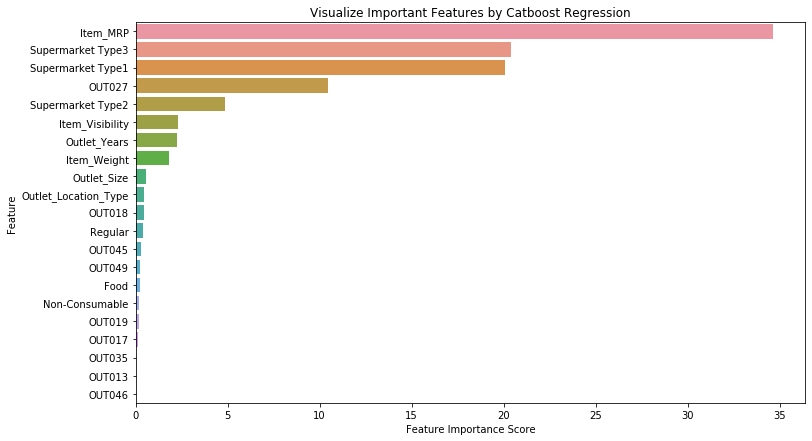

In [14]:
#Fit Random Forest Model to Training Set
cat.fit(X_train, y_train)

#Feature Contribution
feature_cols = X_train.columns
feature_imp = pd.Series(cat.feature_importances_, index = feature_cols).sort_values(ascending = False)
feature_imp

#Create Bar Plot
plt.figure(figsize=(12,7))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Visualize Important Features by Catboost Regression')
plt.show()